### Data Wrangling and Clean Up for Final Capstone

In [1]:
#pip install watermark

In [2]:
import pandas as pd
import numpy as np
import os
import watermark
%load_ext watermark


In [3]:
%watermark 

Last updated: 2022-09-03T22:39:22.598372-05:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [4]:
%watermark --iversions

watermark: 2.3.1
pandas   : 1.2.4
numpy    : 1.20.1



In [5]:
#Find filepath
for f in os.listdir("/Users/ashleymersman/Desktop/Capstone_3_NLP/data/raw/"):
    print(f)

Womens Clothing E-Commerce Reviews.csv
.gitkeep


In [6]:
#Read data into the Dataframe
df = pd.read_csv("/Users/ashleymersman/Desktop/Capstone_3_NLP/data/raw/Womens Clothing E-Commerce Reviews.csv")

In [7]:
#Drop unnecessary columns
df = df.drop(columns="Unnamed: 0")

In [8]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
#Evaluation of what features have missing data
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

array([[<AxesSubplot:title={'center':'Clothing ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Recommended IND'}>],
       [<AxesSubplot:title={'center':'Positive Feedback Count'}>,
        <AxesSubplot:>]], dtype=object)

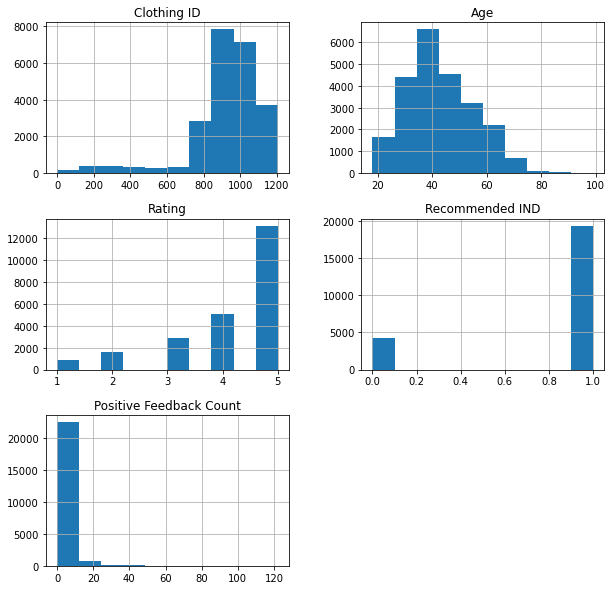

In [11]:
df.hist(figsize=(10,10))

In [12]:
df["Positive Feedback Count"].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

In [13]:
df[df["Positive Feedback Count"]==0]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...
23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts
23480,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses


In [14]:
df[df["Positive Feedback Count"]==122]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses


In [15]:
df[df["Positive Feedback Count"]>=4]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...
23449,262,39,Not for me,I tried these on because the color is really p...,3,0,7,General Petite,Intimate,Lounge
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23467,1104,60,Super flattering!,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses
23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses


In [16]:
df1 = df.drop(columns="Positive Feedback Count")

In [17]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [18]:
#Review Division Values
df1['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [19]:
df1['Division Name'].isnull().sum()

14

In [20]:
#Review Department Values
df1['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [21]:
df1['Department Name'].isnull().sum()

14

In [22]:
#Review Class Values
df1['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [23]:
df1['Class Name'].isnull().sum()

14

In [24]:
df1[df1['Division Name'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,NaN,NaN,NaN


In [25]:
#All rows with missing Division Names are the same ones missing Dept and Class

In [26]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [27]:
df1=df1[df1['Division Name'].notnull()]

In [28]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND
count,23472.000000,23472.000000,23472.000000,23472.000000
mean,918.486665,43.200707,4.195552,0.822256
std,202.727678,12.280913,1.110188,0.382305
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [29]:
#Verify the null values are eliminated
df1.isnull().sum()

Clothing ID           0
Age                   0
Title              3809
Review Text         844
Rating                0
Recommended IND       0
Division Name         0
Department Name       0
Class Name            0
dtype: int64

In [30]:
#Replace any null Title values to combine the Review Text even if there is no title
df1.loc[df1["Title"].isnull(), 'Title'] = " "

In [31]:
#Create column of Text. by combining the Title and Review Text
df1['Text'] = df1['Review Text'] + ' ' + df1['Title'] 

In [32]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,This shirt is very flattering to all due to th...


In [33]:
#Drop Title and Review Text; this data is now in our new Text column
df1 = df1.drop(columns=['Title', 'Review Text'])
df1.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,767,33,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,3,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,1049,50,5,1,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,47,5,1,General,Tops,Blouses,This shirt is very flattering to all due to th...


In [34]:
#review DataFrame shape before removing null values
df1.shape

(23472, 8)

In [35]:
#check for number of null values
df1.isnull().sum()

Clothing ID          0
Age                  0
Rating               0
Recommended IND      0
Division Name        0
Department Name      0
Class Name           0
Text               844
dtype: int64

In [36]:
#Drop NaN
df1=df1.dropna()

In [37]:
#Verify shape 
df1.shape

(22628, 8)

In [38]:
#Verify NaN is 0
df1.isnull().sum()

Clothing ID        0
Age                0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
Text               0
dtype: int64

In [39]:
df1.to_csv("/Users/ashleymersman/Desktop/Capstone_3_NLP/data/processed/cleaned_data.csv")